In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Boiler & BFP 6 month data new.xlsx', sheet_name='Sheet2')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AirTempAPHA                   5112 non-null   object 
 1   AirTempAPHB                   5112 non-null   object 
 2   APHAInPATemp                  5112 non-null   object 
 3   APHAInSATemp                  5112 non-null   object 
 4   APHAOutFlueGasTemp            5112 non-null   object 
 5   APHAOutPATemp                 5112 non-null   object 
 6   APHAOutSATemp                 5112 non-null   object 
 7   APHBInPATemp                  5112 non-null   object 
 8   APHBInSATemp                  5112 non-null   object 
 9   APHBOutFlueGasTemp            5112 non-null   object 
 10  APHBOutPATemp                 5112 non-null   object 
 11  APHBOutSATemp                 5112 non-null   object 
 12  APHPrimaryAirFlowMillA        5112 non-null   object 
 13  APH

# creating new data frame ndf1 with all important parameters

In [4]:
ndf1=df.drop([ 'AirTempAPHA', 'AirTempAPHB', 'BoilerEfficiencyVai', 'DryGasDev', 'FuelGasTempAPHAoutlet1', 'FuelGasTempAPHAoutlet2', 'FuelGasTempAPHAoutlet3', 'FuelGasTempAPHAoutlet4', 'FuelGasTempAPHBoutlet1', 'FuelGasTempAPHBoutlet2', 'FuelGasTempAPHBoutlet3', 'FuelGasTempAPHBoutlet4', 'TempToMillInlet31', 'TempToMillInlet41', 'TempToMillInlet51', 'Load.1' ], axis=1)

In [5]:
ndf1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   APHAInPATemp                  5112 non-null   object 
 1   APHAInSATemp                  5112 non-null   object 
 2   APHAOutFlueGasTemp            5112 non-null   object 
 3   APHAOutPATemp                 5112 non-null   object 
 4   APHAOutSATemp                 5112 non-null   object 
 5   APHBInPATemp                  5112 non-null   object 
 6   APHBInSATemp                  5112 non-null   object 
 7   APHBOutFlueGasTemp            5112 non-null   object 
 8   APHBOutPATemp                 5112 non-null   object 
 9   APHBOutSATemp                 5112 non-null   object 
 10  APHPrimaryAirFlowMillA        5112 non-null   object 
 11  APHPrimaryAirFlowMillB        5112 non-null   object 
 12  APHPrimaryAirFlowMillC        5112 non-null   object 
 13  Ash

# performing normalization on ndf1

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
ndf1_col=ndf1.columns

for i in range(len(ndf1_col)):
    #print(ndf1_col[i])
    ndf1.drop(ndf1[ndf1[ndf1_col[i]] == '[-11059] No Good Data For Calculation'].index, inplace = True)
print(ndf1.shape)


(4969, 44)


In [8]:
feature_list=ndf1.columns

In [9]:
for i in range(len(feature_list)):
    ndf1[feature_list[i]] = ndf1[feature_list[i]].astype(float)

In [10]:
ndf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 5111
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   APHAInPATemp                  4969 non-null   float64
 1   APHAInSATemp                  4969 non-null   float64
 2   APHAOutFlueGasTemp            4969 non-null   float64
 3   APHAOutPATemp                 4969 non-null   float64
 4   APHAOutSATemp                 4969 non-null   float64
 5   APHBInPATemp                  4969 non-null   float64
 6   APHBInSATemp                  4969 non-null   float64
 7   APHBOutFlueGasTemp            4969 non-null   float64
 8   APHBOutPATemp                 4969 non-null   float64
 9   APHBOutSATemp                 4969 non-null   float64
 10  APHPrimaryAirFlowMillA        4969 non-null   float64
 11  APHPrimaryAirFlowMillB        4969 non-null   float64
 12  APHPrimaryAirFlowMillC        4969 non-null   float64
 13  Ash

# normalization and predictor, target

In [11]:
predictor = ndf1.drop('BoilerEfficiency', axis = 1)
prd_col=predictor.columns
predictor.shape

(4969, 43)

In [12]:
target= ndf1['BoilerEfficiency']
target=np.array(target).reshape(-1,1)
target.shape

(4969, 1)

In [13]:
pre_scaler = MinMaxScaler()
pre_fit = pre_scaler.fit(predictor)
predictor=pre_fit.transform(predictor)

In [14]:
predictor

array([[0.56561154, 0.60184904, 0.74712125, ..., 0.83891107, 0.11823192,
        0.31307968],
       [0.54618943, 0.57464638, 0.73743072, ..., 0.84069988, 0.11879139,
        0.2852347 ],
       [0.52024423, 0.53537821, 0.72818785, ..., 0.8424887 , 0.11935086,
        0.25738971],
       ...,
       [0.43198212, 0.39404916, 0.59283541, ..., 0.74058912, 0.28175792,
        0.27465036],
       [0.42550326, 0.38063642, 0.59255232, ..., 0.74047408, 0.28200813,
        0.27512068],
       [0.37069819, 0.29067756, 0.58627859, ..., 0.74035903, 0.28225834,
        0.27559099]])

In [15]:
#target_scaler = MinMaxScaler()
#target_fit = target_scaler.fit(target)
#target=target_fit.transform(target)

In [16]:
target

array([[89.12147224],
       [89.15739906],
       [89.19332588],
       ...,
       [89.65831895],
       [89.56704851],
       [89.47577806]])

# EDA

# creating boxplot for outliners

In [17]:
ndf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 5111
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   APHAInPATemp                  4969 non-null   float64
 1   APHAInSATemp                  4969 non-null   float64
 2   APHAOutFlueGasTemp            4969 non-null   float64
 3   APHAOutPATemp                 4969 non-null   float64
 4   APHAOutSATemp                 4969 non-null   float64
 5   APHBInPATemp                  4969 non-null   float64
 6   APHBInSATemp                  4969 non-null   float64
 7   APHBOutFlueGasTemp            4969 non-null   float64
 8   APHBOutPATemp                 4969 non-null   float64
 9   APHBOutSATemp                 4969 non-null   float64
 10  APHPrimaryAirFlowMillA        4969 non-null   float64
 11  APHPrimaryAirFlowMillB        4969 non-null   float64
 12  APHPrimaryAirFlowMillC        4969 non-null   float64
 13  Ash

In [18]:
feature_list=ndf1.columns

In [19]:
feature_list

Index(['APHAInPATemp', 'APHAInSATemp', 'APHAOutFlueGasTemp', 'APHAOutPATemp',
       'APHAOutSATemp', 'APHBInPATemp', 'APHBInSATemp', 'APHBOutFlueGasTemp',
       'APHBOutPATemp', 'APHBOutSATemp', 'APHPrimaryAirFlowMillA',
       'APHPrimaryAirFlowMillB', 'APHPrimaryAirFlowMillC', 'AshInCoal',
       'BoilerEfficiency', 'CarbonContent', 'Dry Gases Monetary Loss',
       'DryFlueGasLoss', 'ExcessAirSupplied', 'GCVContent',
       'HeatLossDueToUnburntInAsh', 'HydrogenContent', 'Load',
       'LossDueToHydrogen', 'LossDueToMoistureInAir',
       'LossDueToMoistureInFuel', 'MoistureContent', 'NitrogenContent',
       'OxygenContent', 'OxygenContentAPHAInlet', 'OxygenContentAPHAoutlet',
       'OxygenContentAPHBInlet', 'OxygenContentAPHBoutlet',
       'RadiationManufactuMargin', 'SecAirFlowPassA', 'SecAirFlowPassB',
       'SulphurContent', 'TotalAirFlow', 'TotalCoalFlow',
       'Unburnt Carbon Monetary Loss', 'UnburntCarbonDev',
       'UnburntCarboninBedAsh', 'UnburntCarboninFlyAsh', '

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


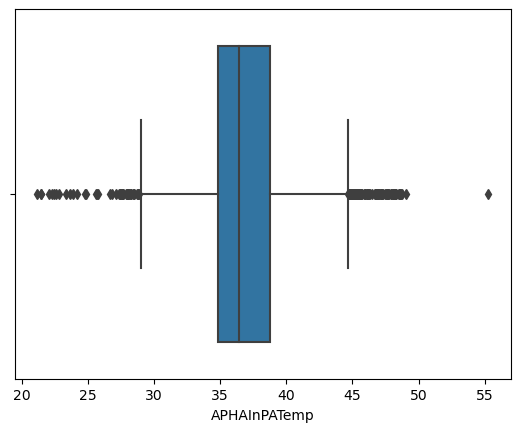

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


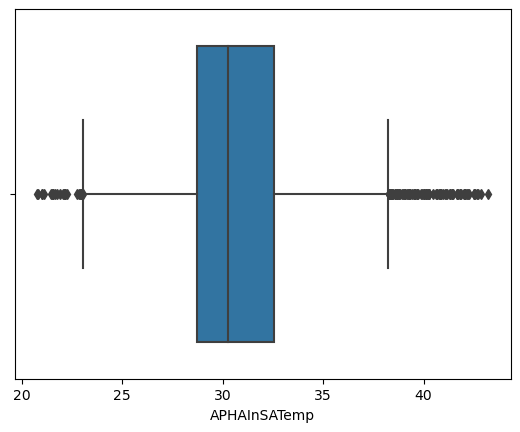

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


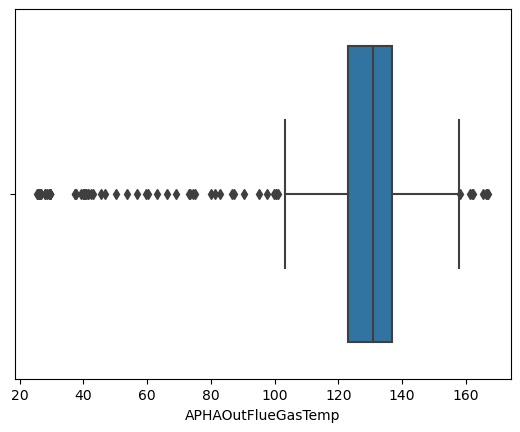

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


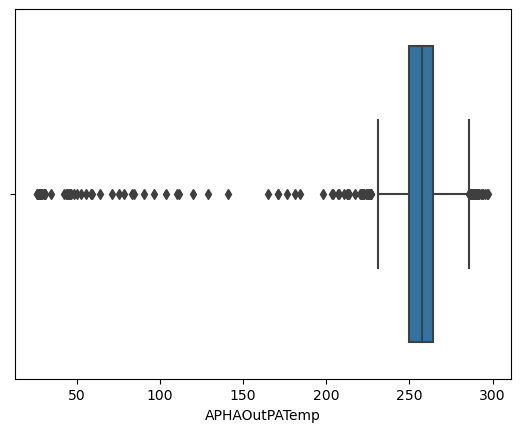

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


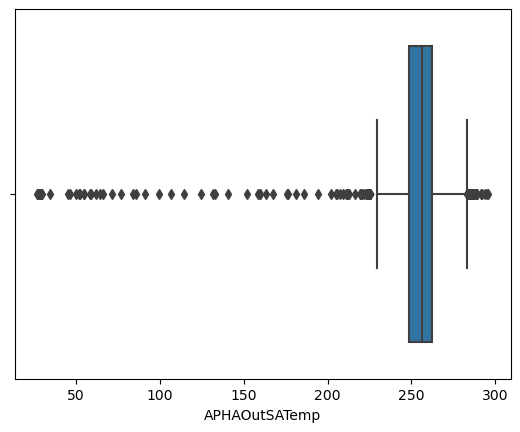

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


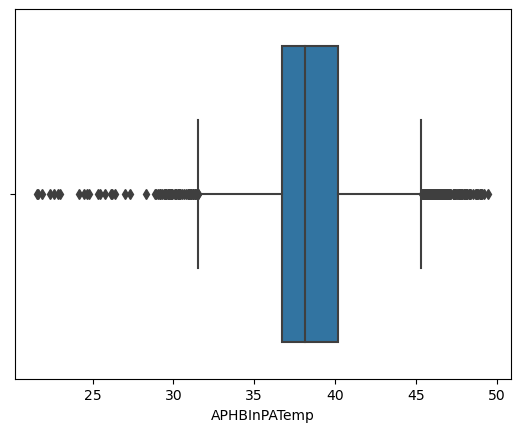

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


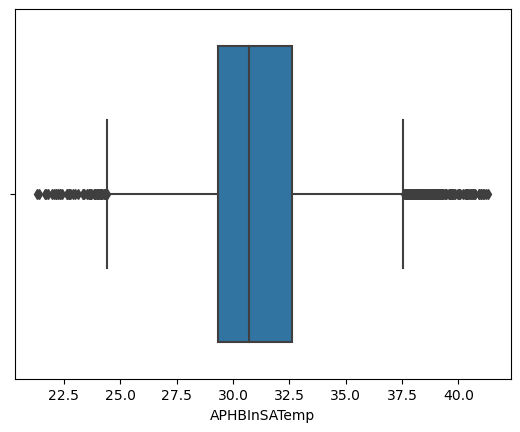

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


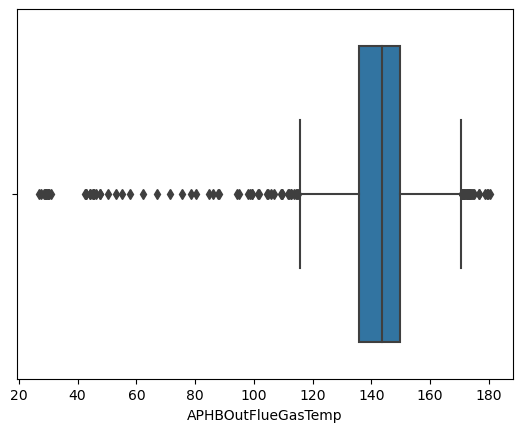

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


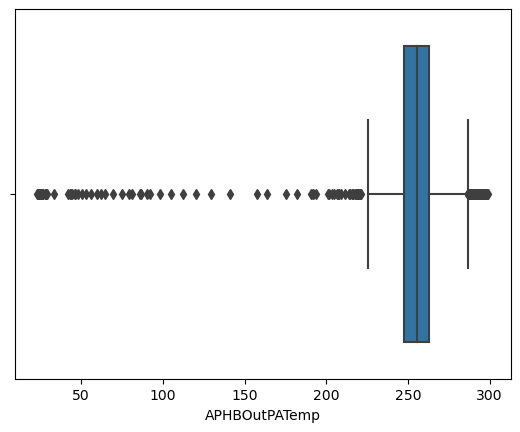

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


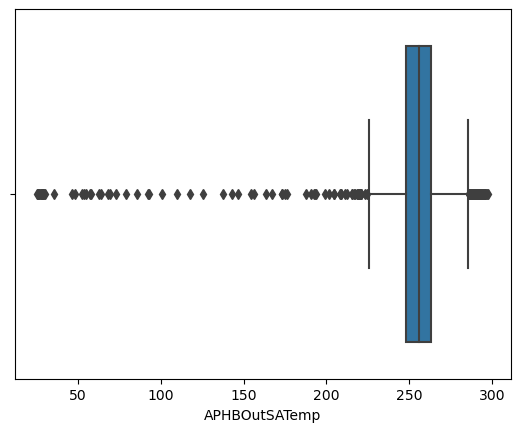

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


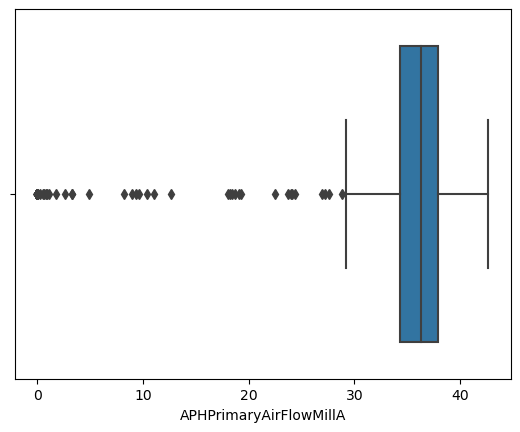

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


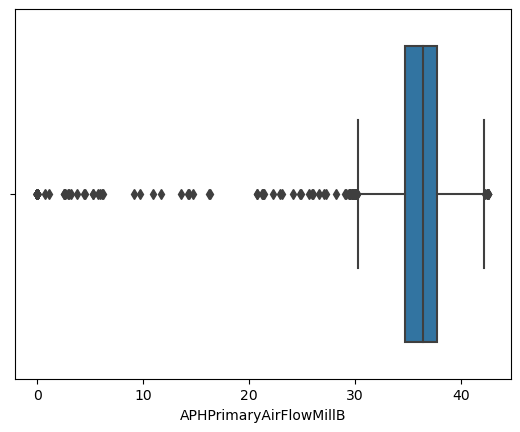

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


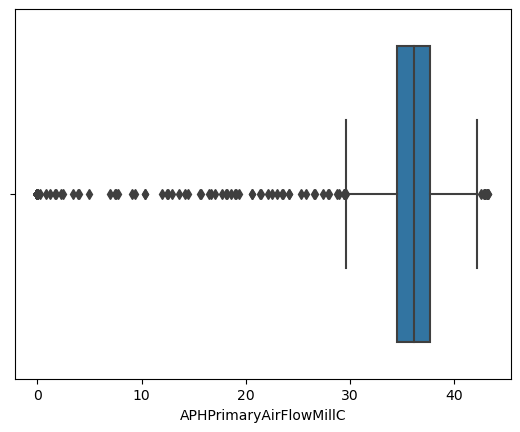

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


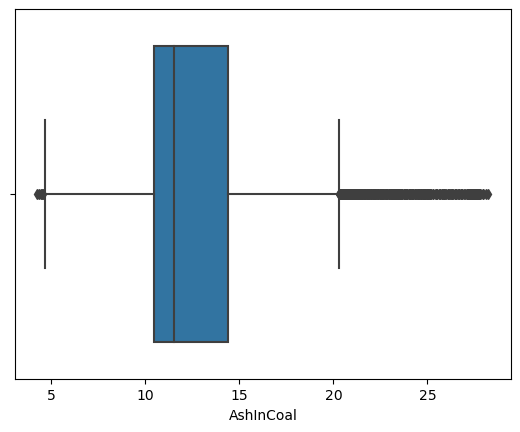

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


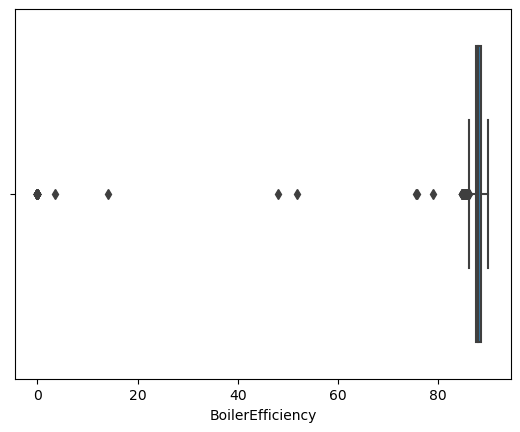

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


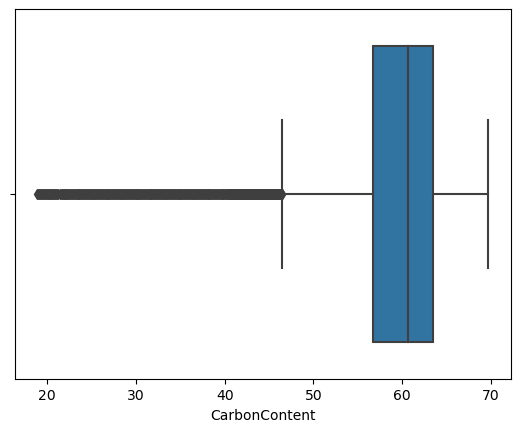

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


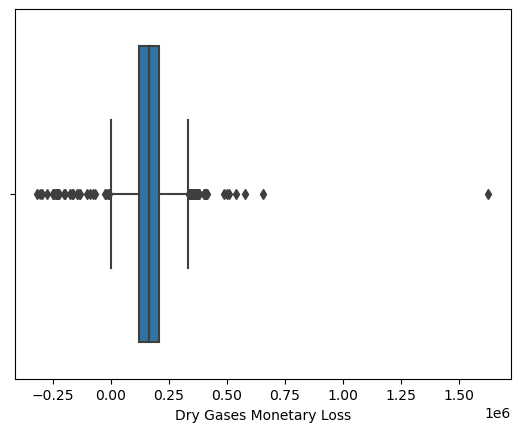

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


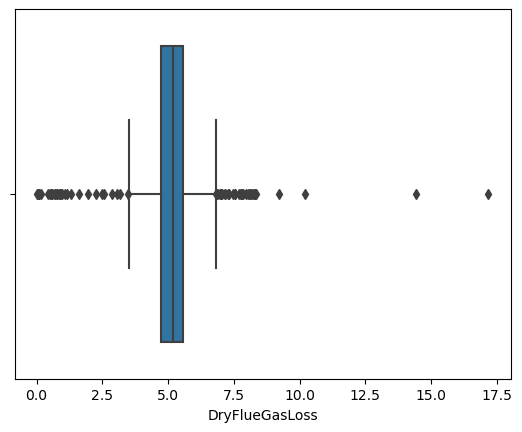

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


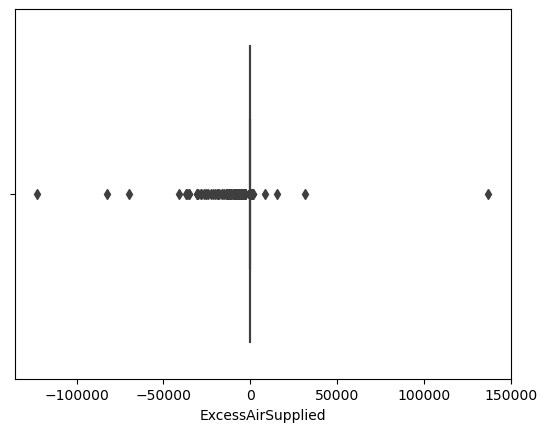

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


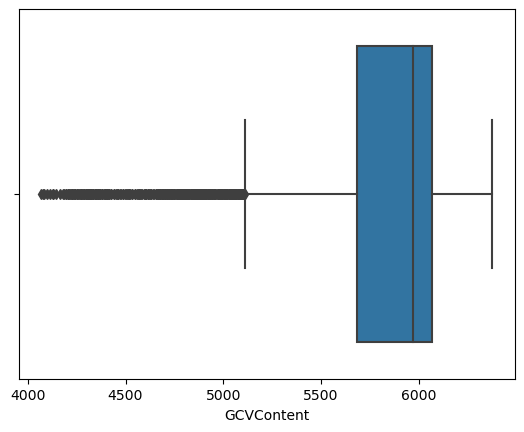

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


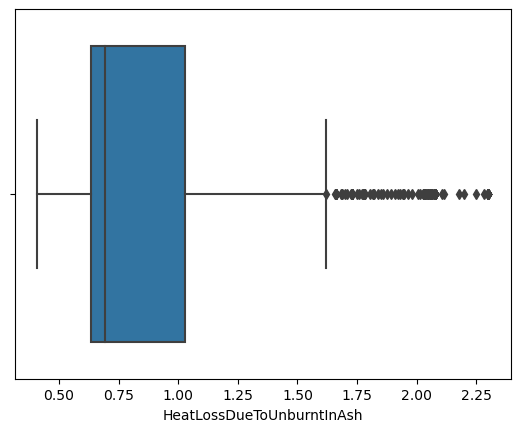

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


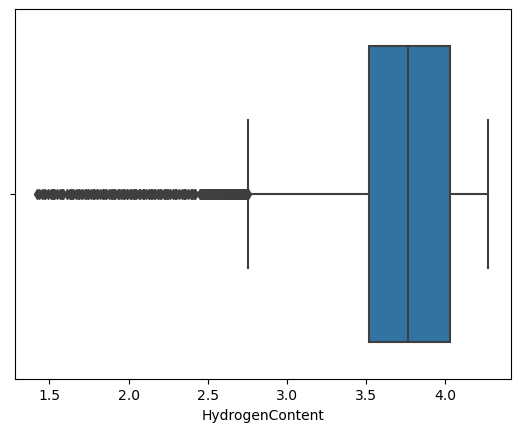

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


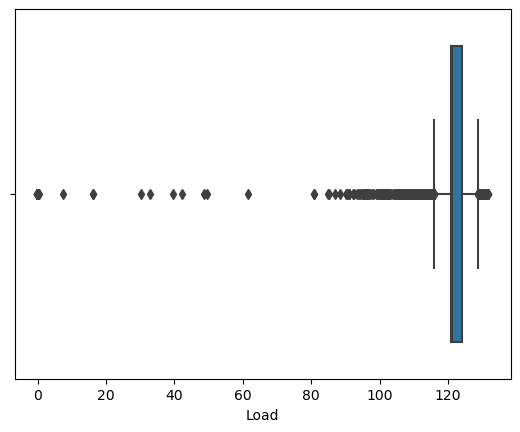

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


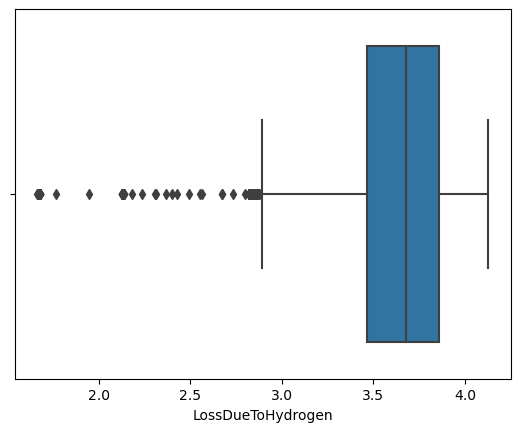

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


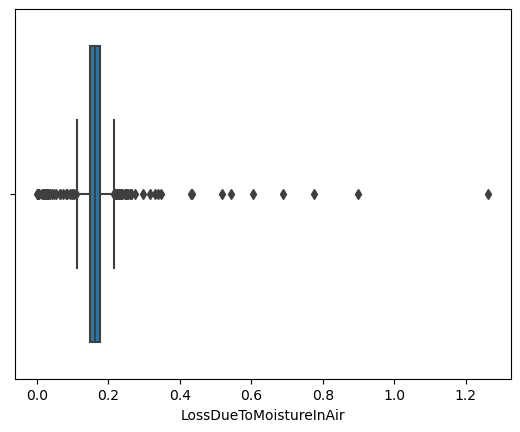

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


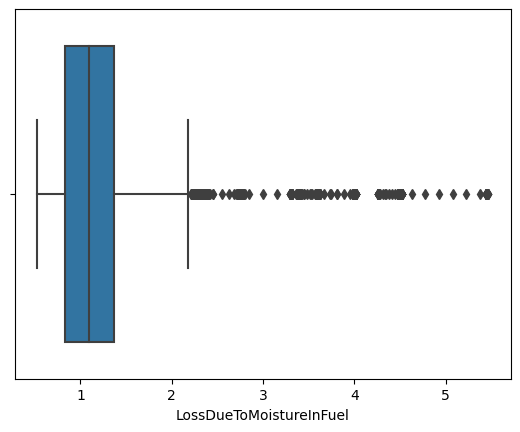

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


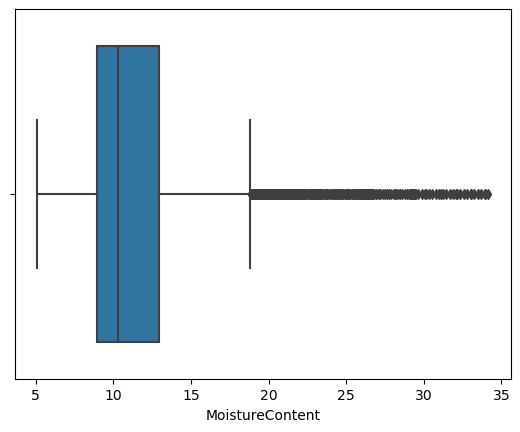

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


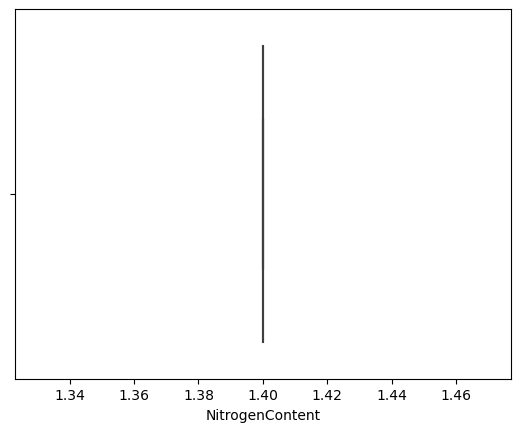

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


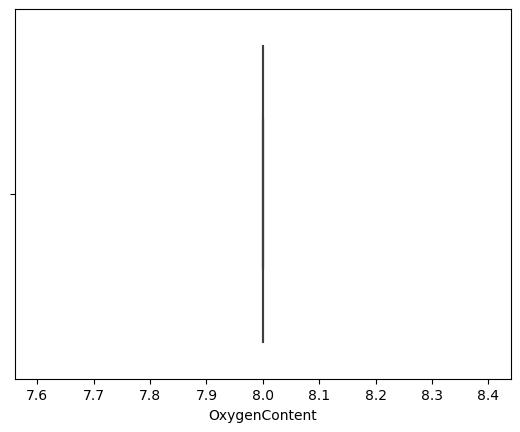

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


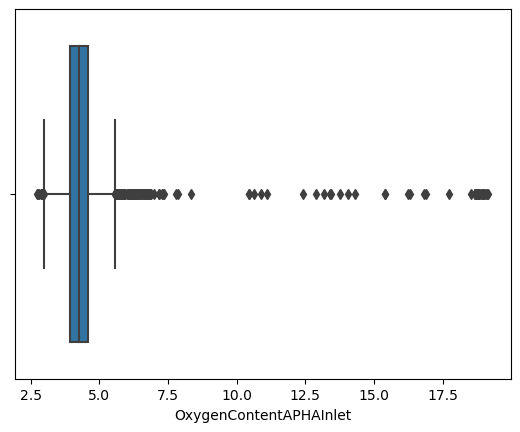

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


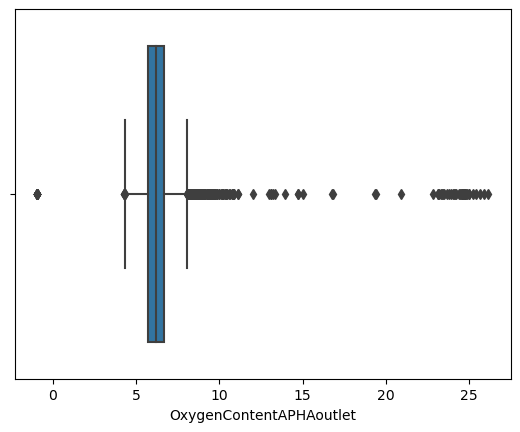

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


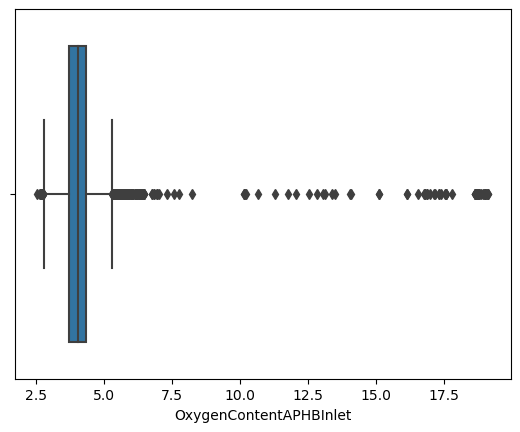

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


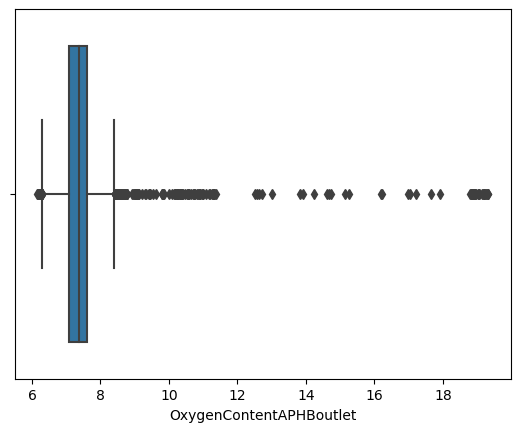

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


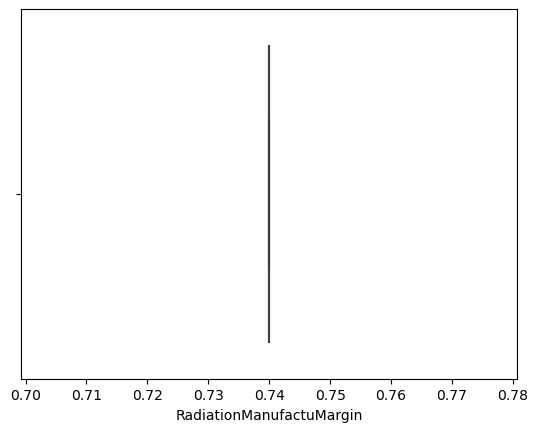

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


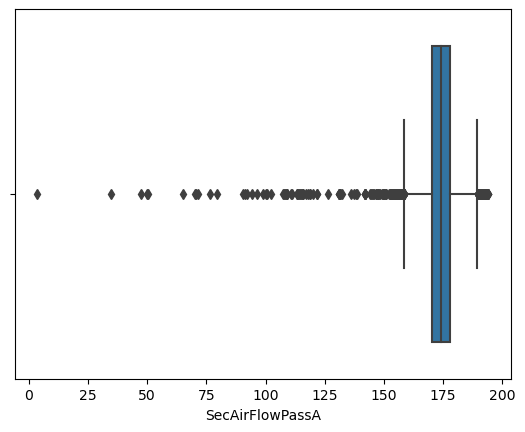

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


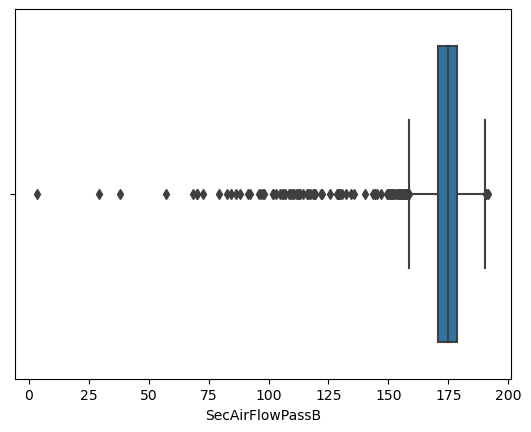

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


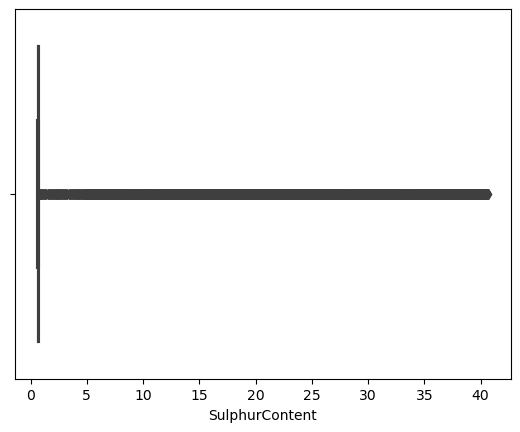

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


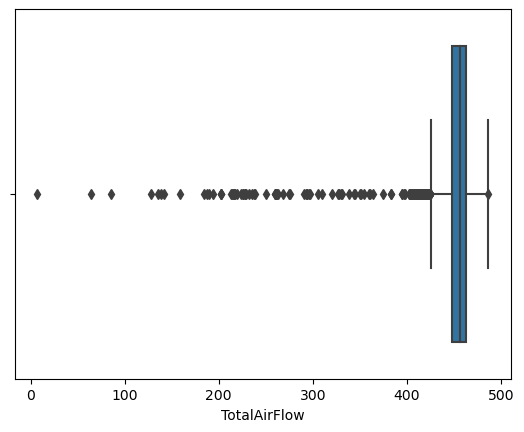

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


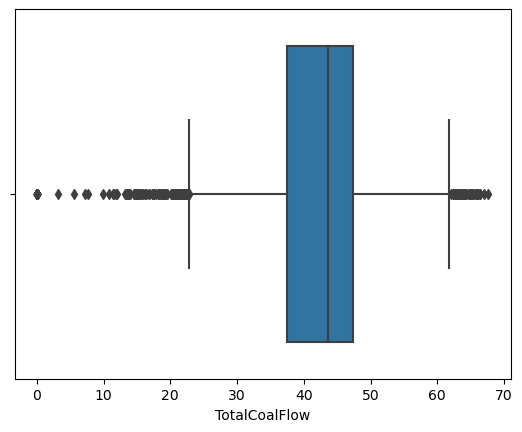

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


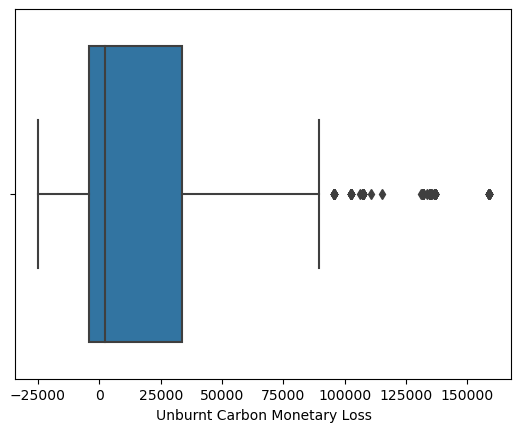

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


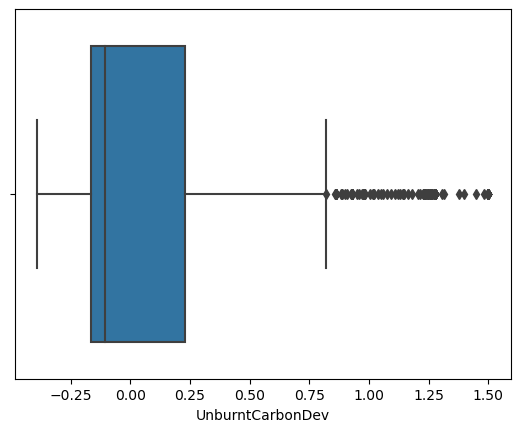

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


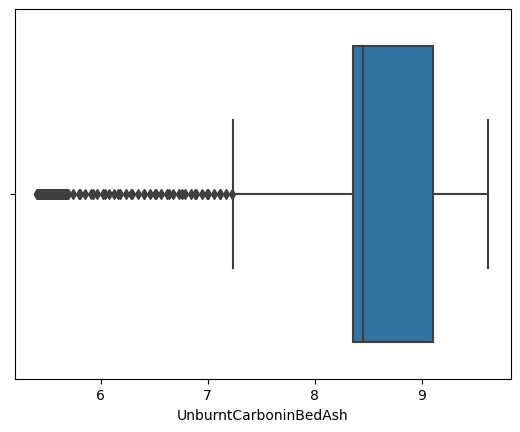

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


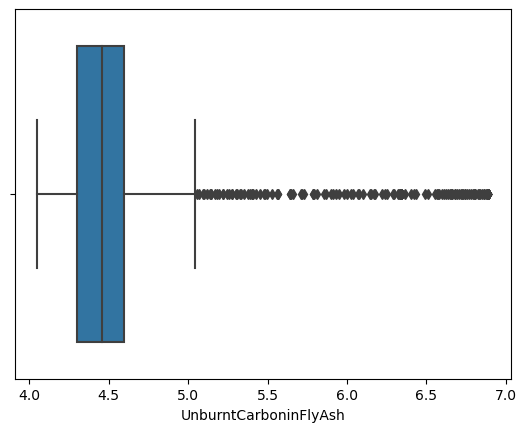

<Figure size 100x100 with 0 Axes>

C:\Users\omgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


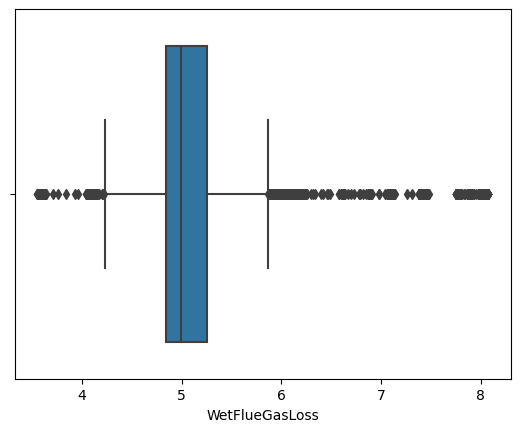

<Figure size 100x100 with 0 Axes>

In [20]:
for i in range(len(feature_list)):
    sns.boxplot(ndf1[feature_list[i]])
    plt.figure(figsize=(1, 1))
    plt.show()

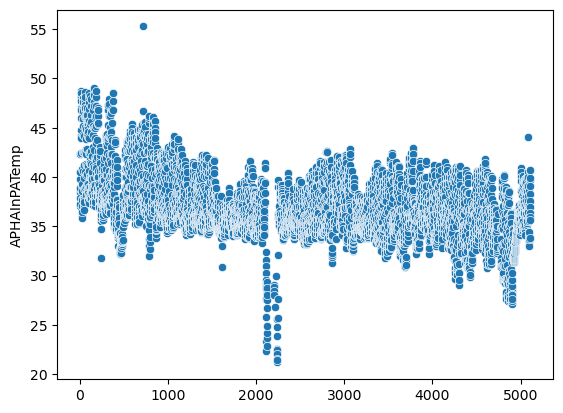

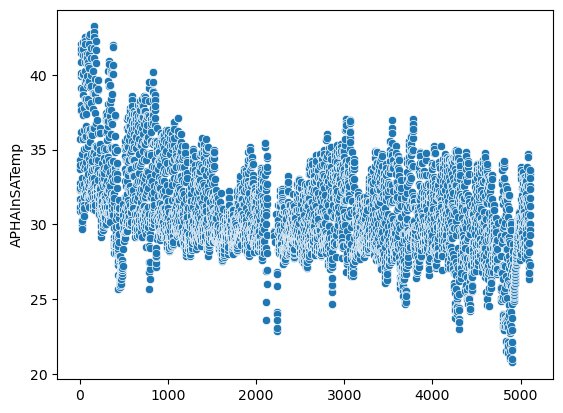

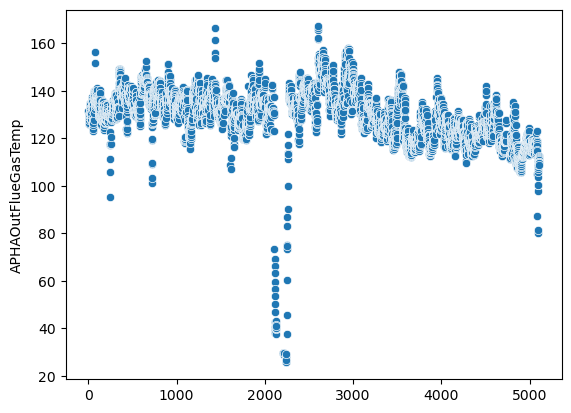

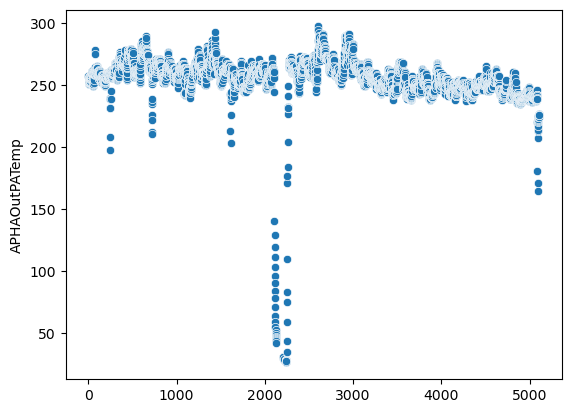

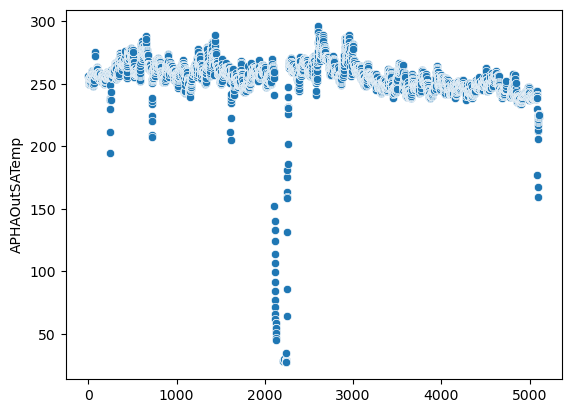

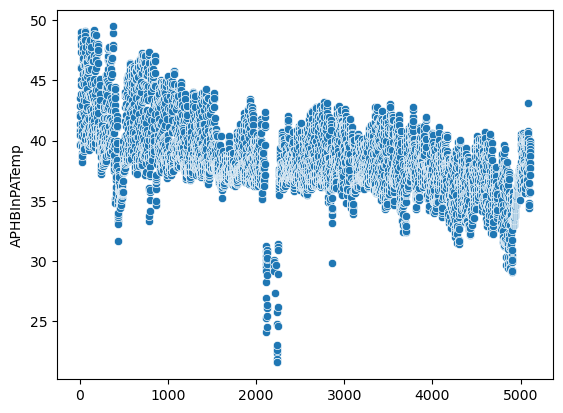

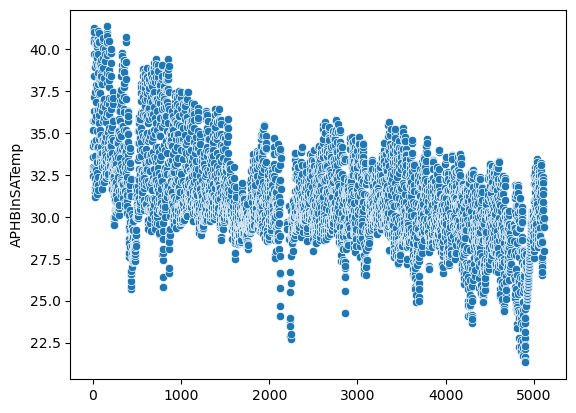

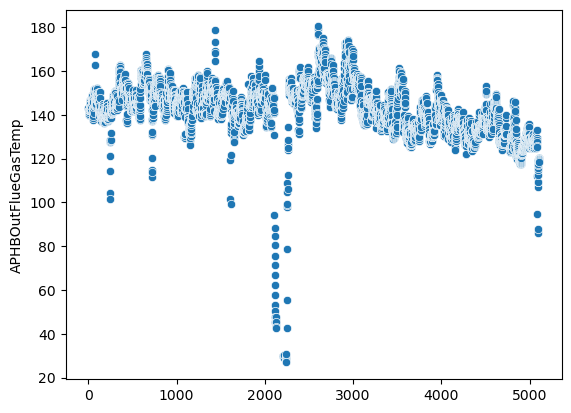

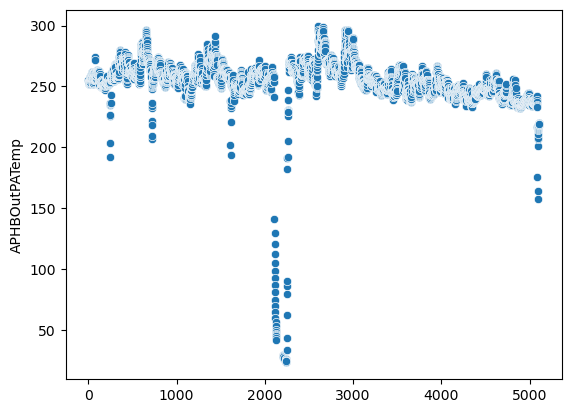

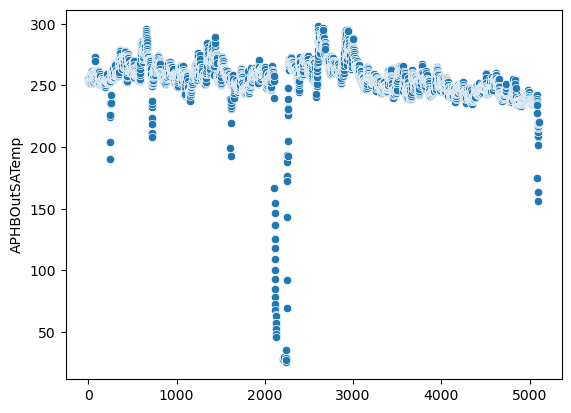

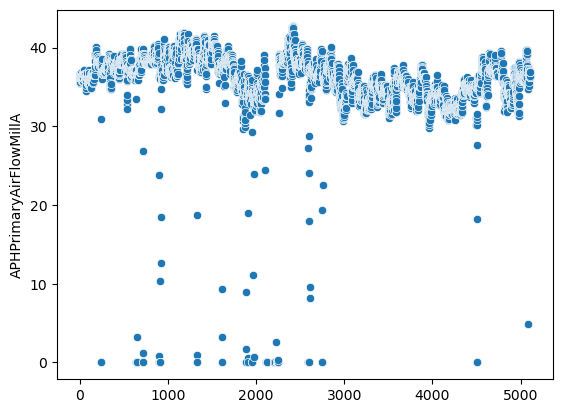

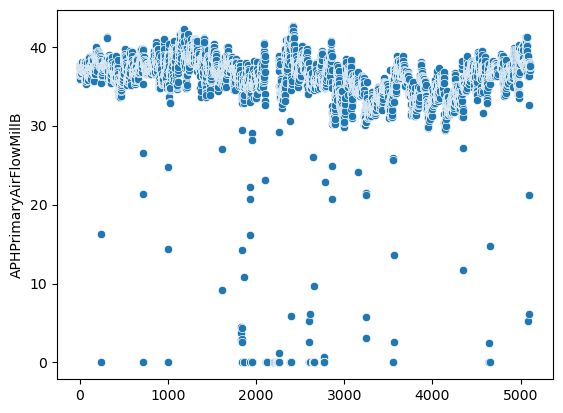

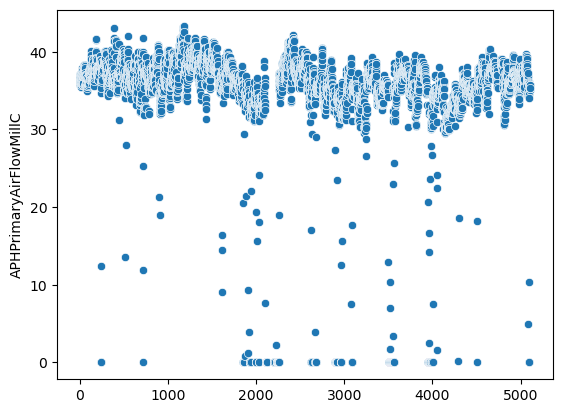

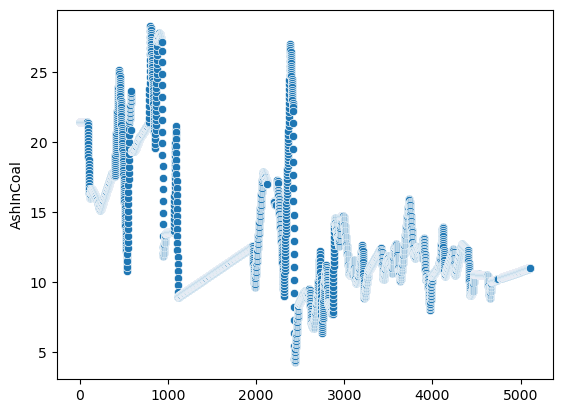

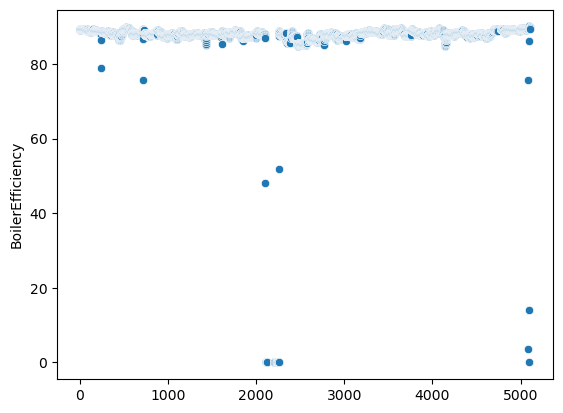

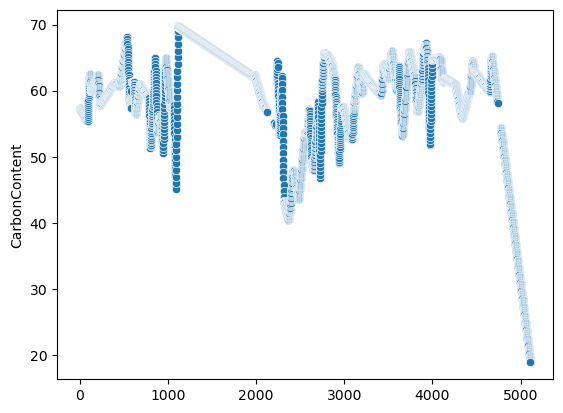

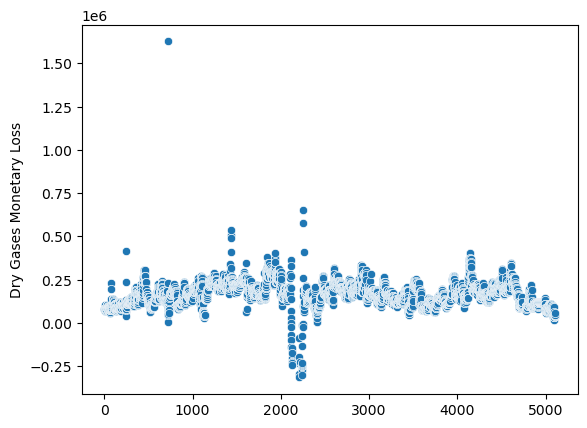

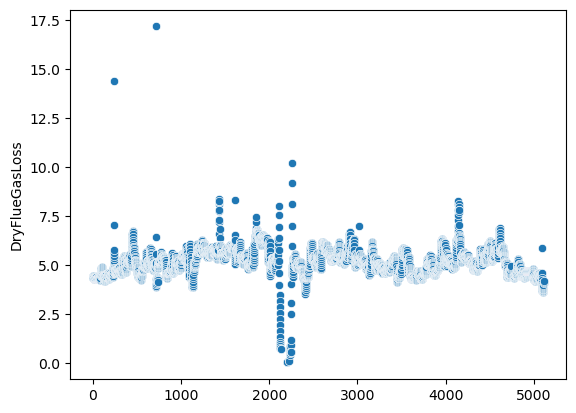

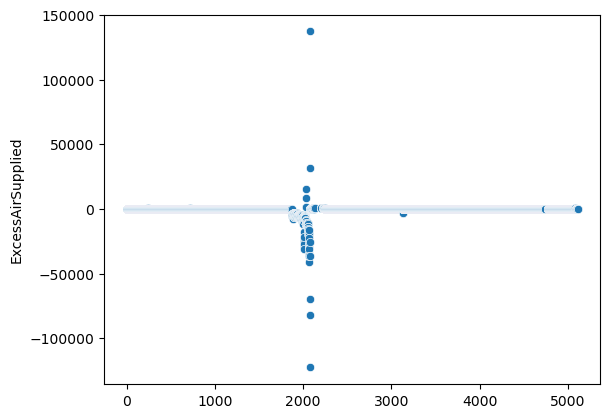

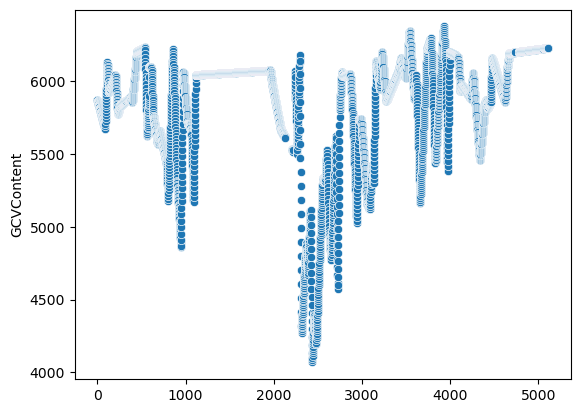

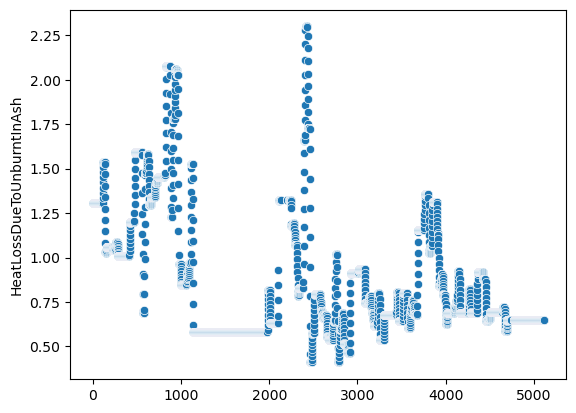

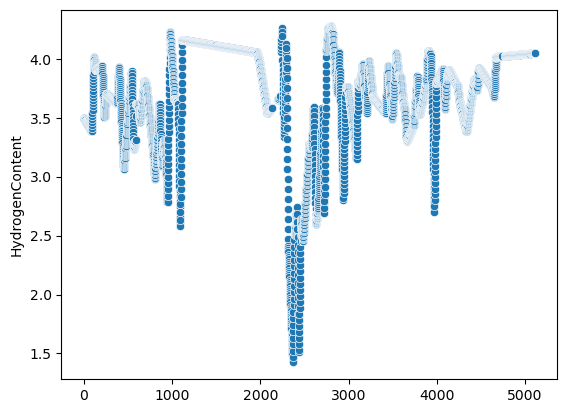

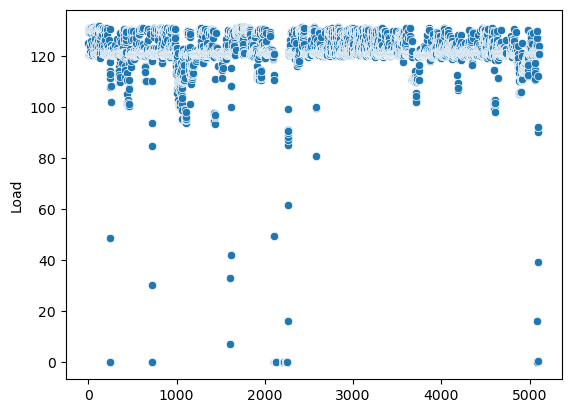

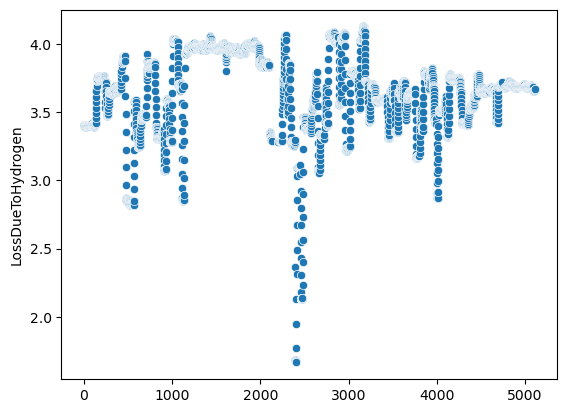

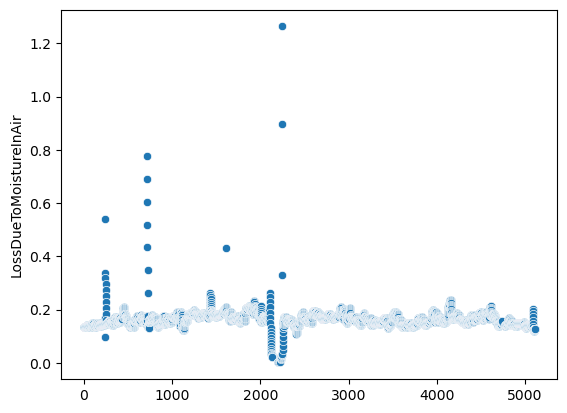

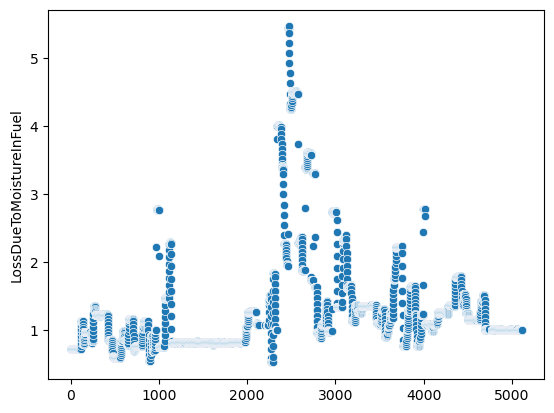

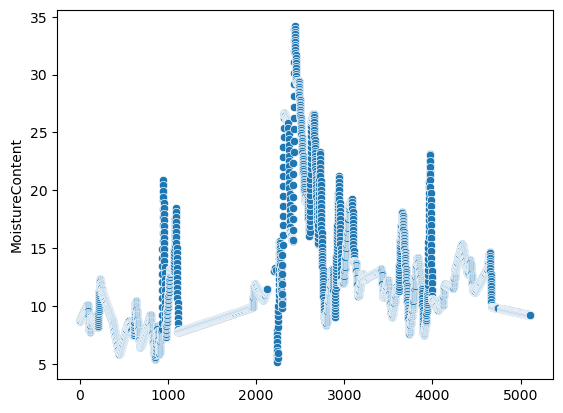

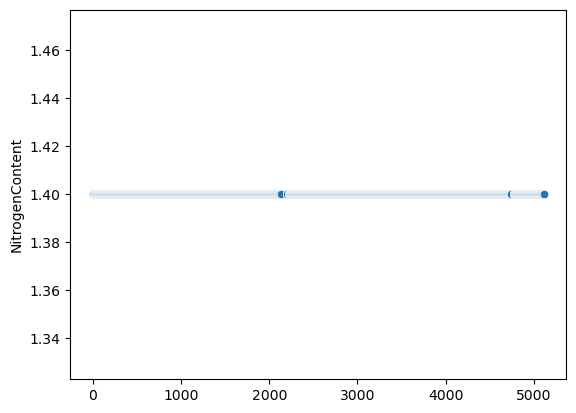

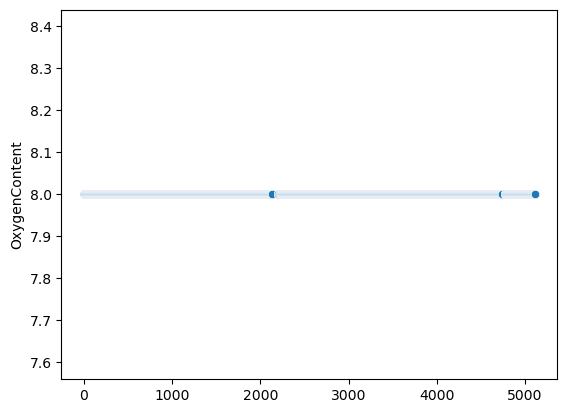

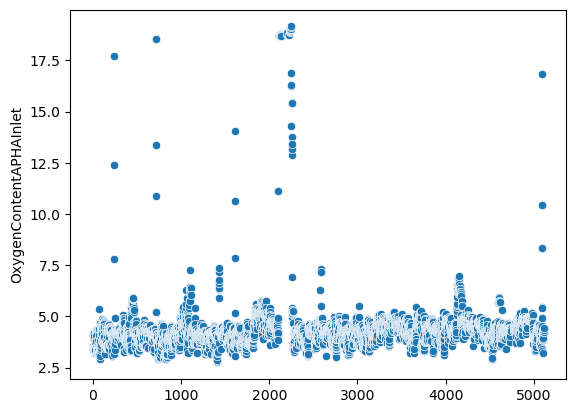

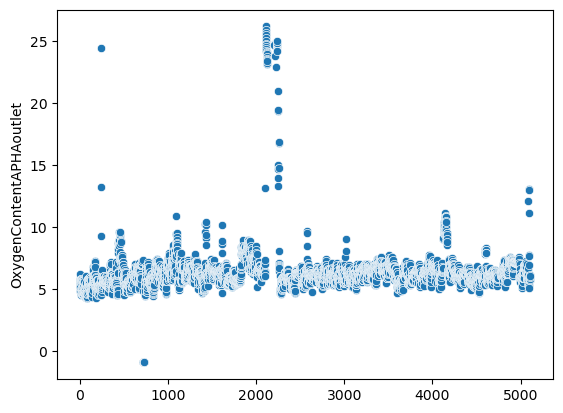

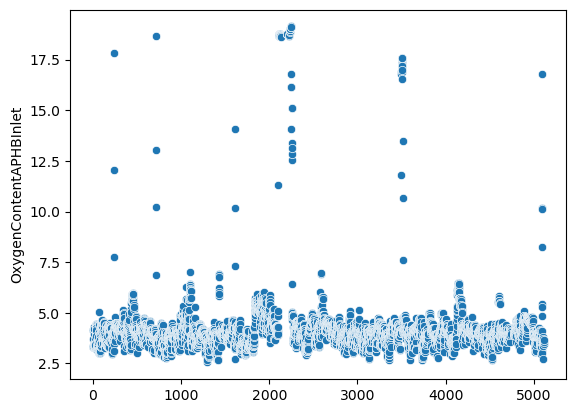

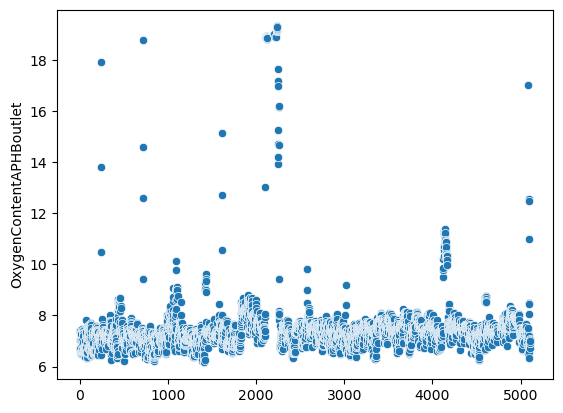

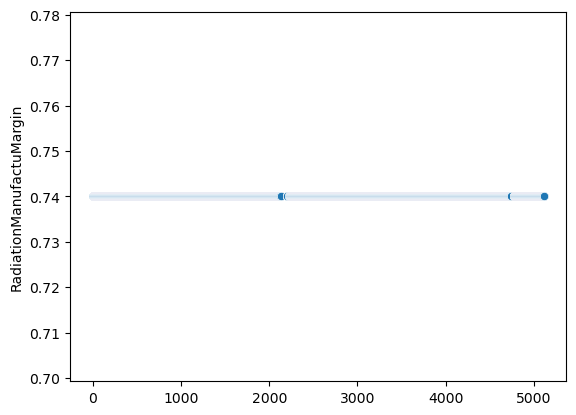

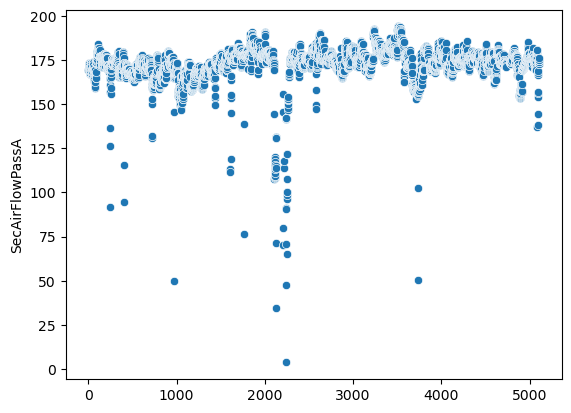

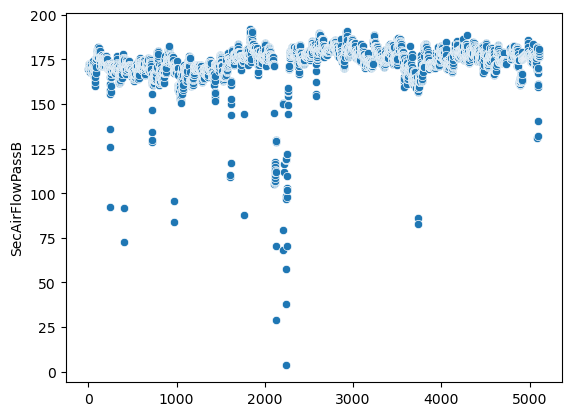

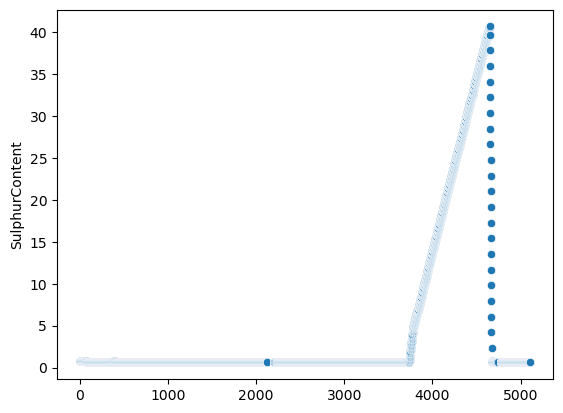

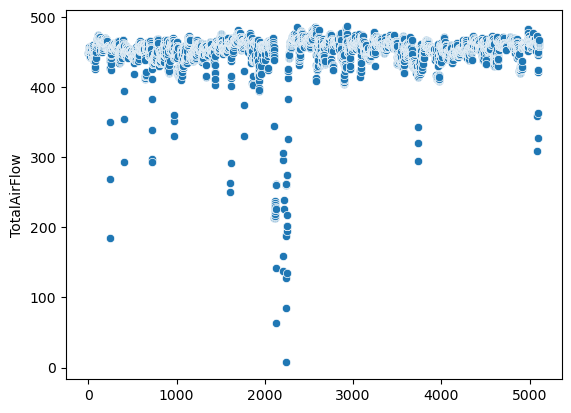

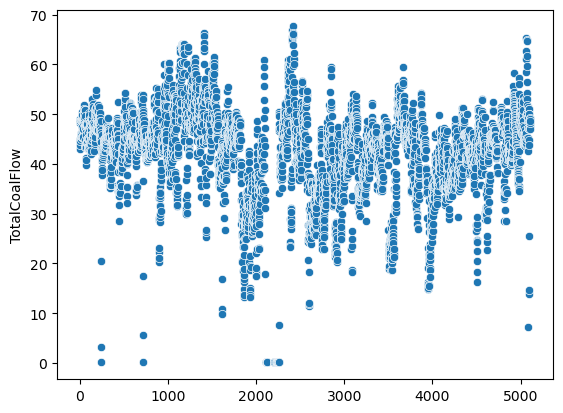

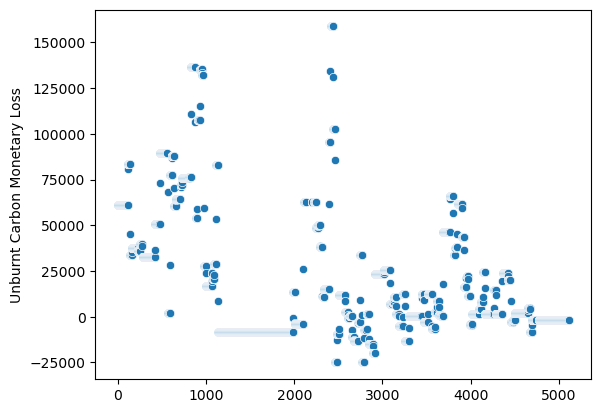

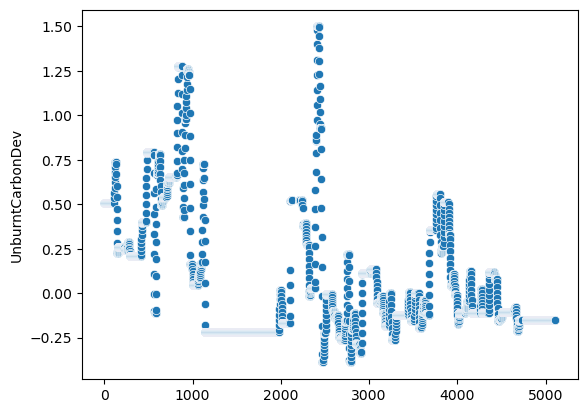

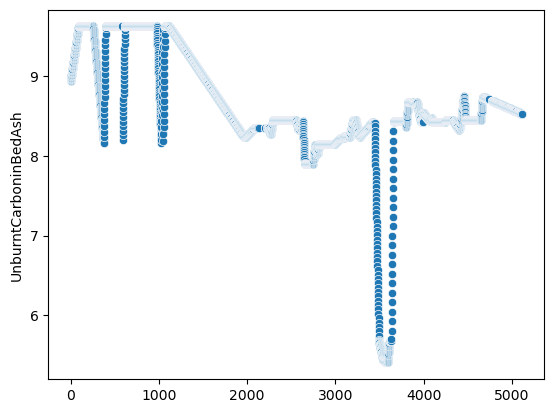

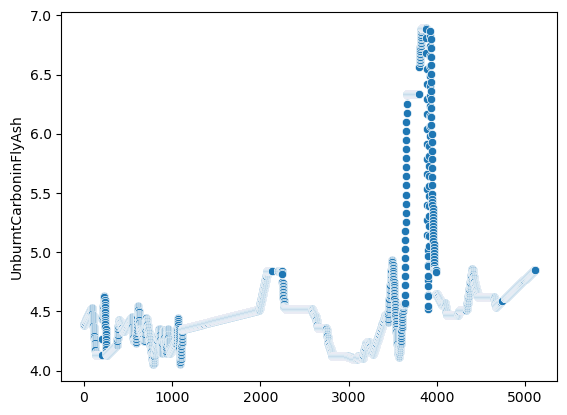

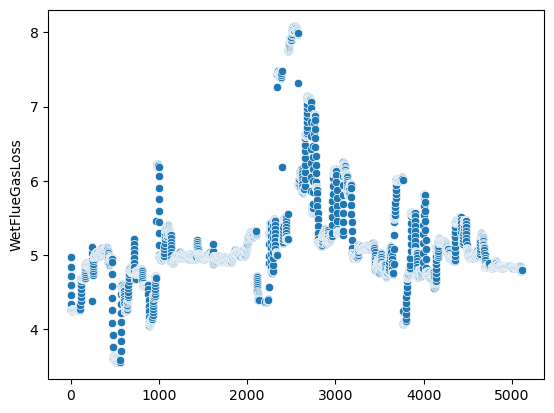

In [21]:
for i in range(len(feature_list)):
    sns.scatterplot(data=ndf1, y=ndf1[feature_list[i]], x=ndf1.index)
    
    plt.show()

<AxesSubplot:ylabel='BoilerEfficiency'>

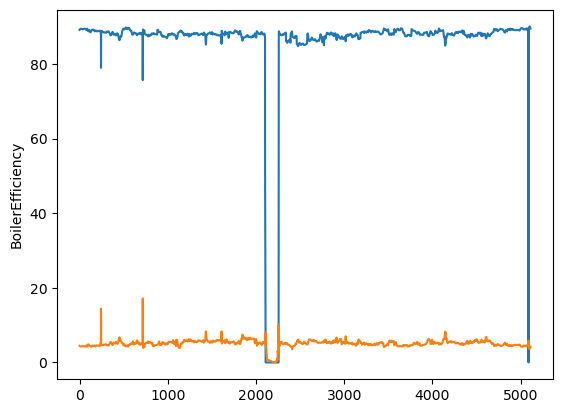

In [22]:
sns.lineplot (x=ndf1.index, y=ndf1['BoilerEfficiency'])
sns.lineplot (x=ndf1.index, y=ndf1['DryFlueGasLoss'])

<AxesSubplot:ylabel='BoilerEfficiency'>

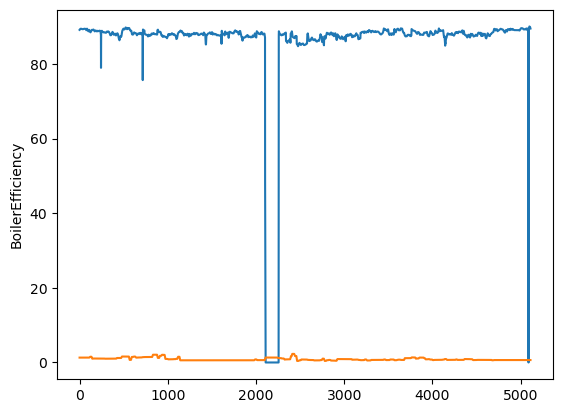

In [23]:
sns.lineplot (x=ndf1.index, y=ndf1['BoilerEfficiency'])
sns.lineplot (x=ndf1.index, y=ndf1['HeatLossDueToUnburntInAsh'])

<AxesSubplot:ylabel='BoilerEfficiency'>

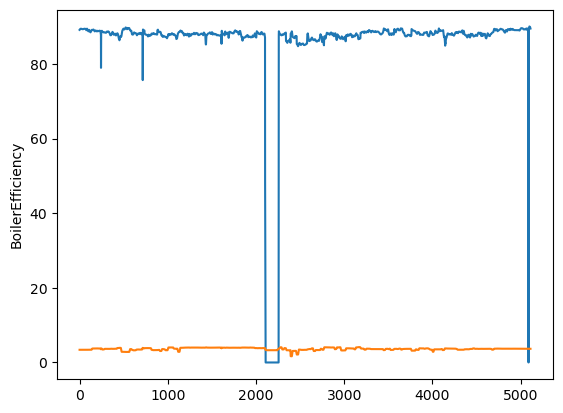

In [24]:
sns.lineplot (x=ndf1.index, y=ndf1['BoilerEfficiency'])
sns.lineplot (x=ndf1.index, y=ndf1['LossDueToHydrogen'])

<AxesSubplot:ylabel='BoilerEfficiency'>

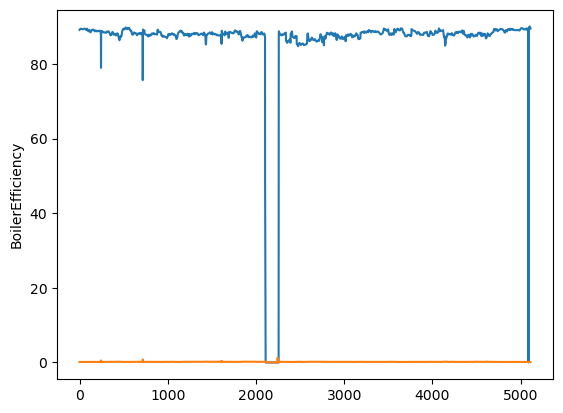

In [25]:
sns.lineplot (x=ndf1.index, y=ndf1['BoilerEfficiency'])
sns.lineplot (x=ndf1.index, y=ndf1['LossDueToMoistureInAir'])

<AxesSubplot:ylabel='BoilerEfficiency'>

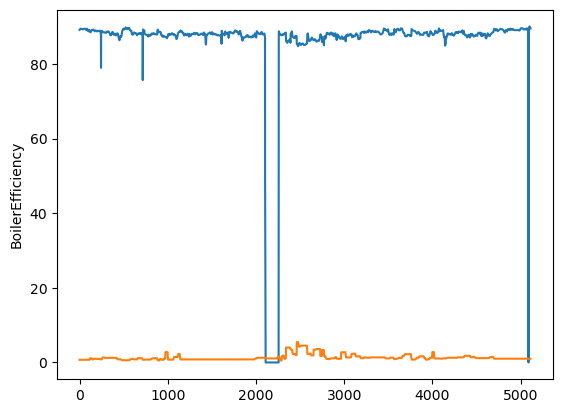

In [26]:
sns.lineplot (x=ndf1.index, y=ndf1['BoilerEfficiency'])
sns.lineplot (x=ndf1.index, y=ndf1['LossDueToMoistureInFuel'])

# Making a dataframe for dry flue gass to check its correlation with boiler efficiency with other variables

In [27]:
for i in range(len(feature_list)):
    ndf1[feature_list[i]] = ndf1[feature_list[i]].astype(float)

# correlationn of boiler with all its parameter losses

<AxesSubplot:>

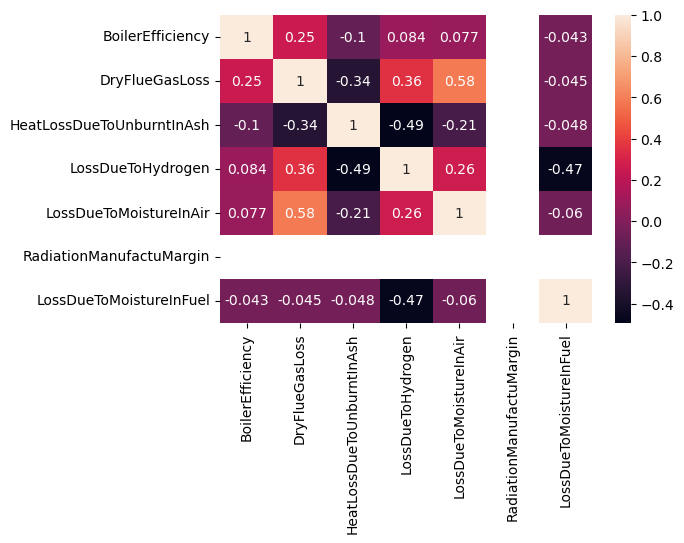

In [28]:
newdf=ndf1.loc[0:,['BoilerEfficiency', 'DryFlueGasLoss', 'HeatLossDueToUnburntInAsh', 'LossDueToHydrogen', 'LossDueToMoistureInAir',  'RadiationManufactuMargin','LossDueToMoistureInFuel' ]]
plt.figure(figsize=(6, 4))
sns.heatmap(newdf.corr(), annot=True)

In [29]:
ndfcorr = ndf1.loc[:, ['BoilerEfficiency', 'DryFlueGasLoss', 'GCVContent', 'APHAInPATemp', 'APHPrimaryAirFlowMillA', 'APHPrimaryAirFlowMillB', 'APHPrimaryAirFlowMillC', 'SecAirFlowPassA', 'APHAInSATemp', 'APHBInPATemp', 'SecAirFlowPassB', 'APHBInSATemp', 'OxygenContentAPHAInlet', 'OxygenContentAPHAoutlet', 'OxygenContentAPHBInlet', 'OxygenContentAPHBoutlet', 'APHAOutFlueGasTemp', 'APHBOutFlueGasTemp', 'CarbonContent',]]
ndfcorr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 5111
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BoilerEfficiency         4969 non-null   float64
 1   DryFlueGasLoss           4969 non-null   float64
 2   GCVContent               4969 non-null   float64
 3   APHAInPATemp             4969 non-null   float64
 4   APHPrimaryAirFlowMillA   4969 non-null   float64
 5   APHPrimaryAirFlowMillB   4969 non-null   float64
 6   APHPrimaryAirFlowMillC   4969 non-null   float64
 7   SecAirFlowPassA          4969 non-null   float64
 8   APHAInSATemp             4969 non-null   float64
 9   APHBInPATemp             4969 non-null   float64
 10  SecAirFlowPassB          4969 non-null   float64
 11  APHBInSATemp             4969 non-null   float64
 12  OxygenContentAPHAInlet   4969 non-null   float64
 13  OxygenContentAPHAoutlet  4969 non-null   float64
 14  OxygenContentAPHBInlet  

<AxesSubplot:>

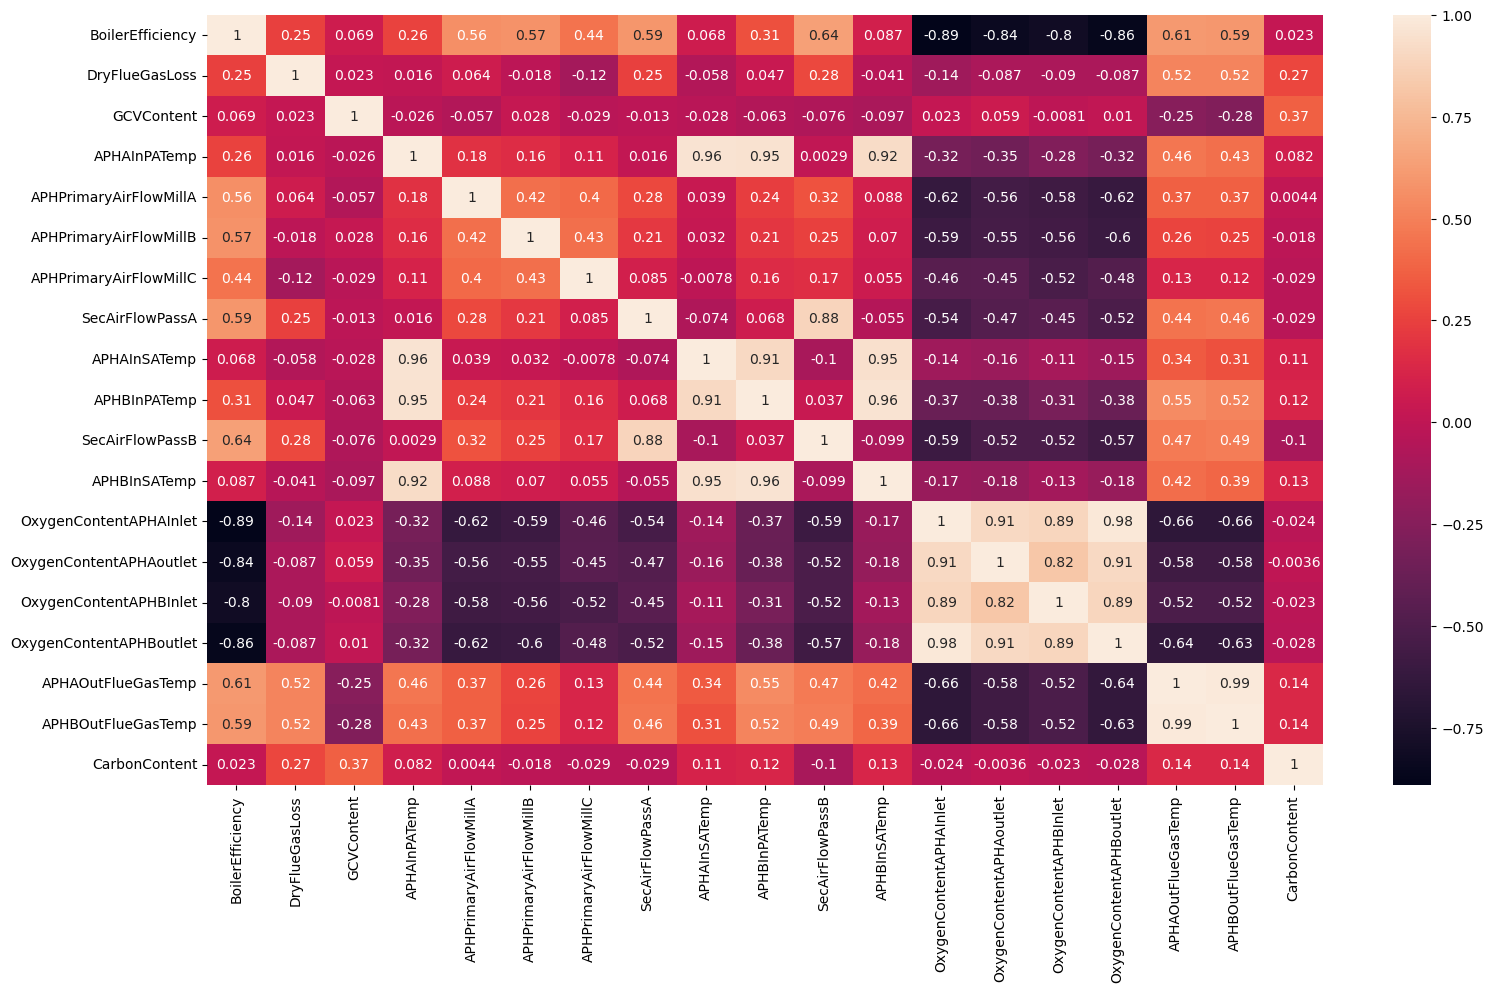

In [30]:
plt.figure(figsize=(18, 10))
sns.heatmap(ndfcorr.corr(), annot=True)


# Making a dataframe for LossDueToHydrogen , LossDueToMoistureInFuel, LossDueToMoistureInAir to check its correlation with boiler efficiency with other variables

In [31]:
ldth = ndf1.loc[:,['BoilerEfficiency', 'HydrogenContent', 'LossDueToHydrogen', 'LossDueToMoistureInFuel', 'LossDueToMoistureInAir' ]]

<AxesSubplot:>

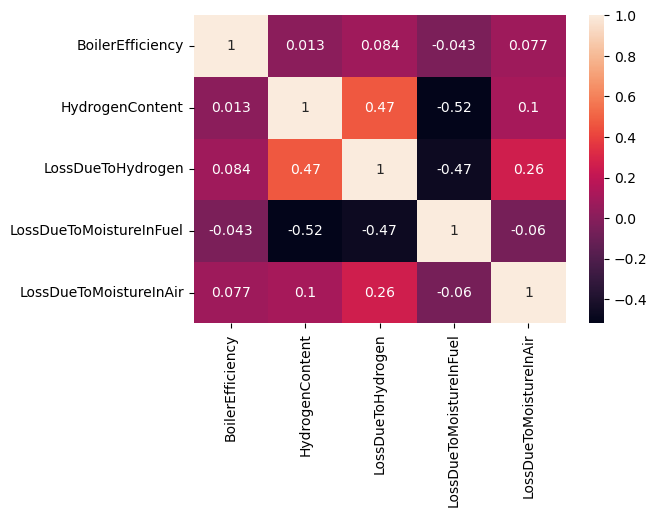

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(ldth.corr(), annot=True)

# Making a dataframe for HeatLossDueToUnburntAsh to check its correlation with boiler efficiency with other variables

In [33]:
hldtua = ndf1.loc[:,['BoilerEfficiency', 'AshInCoal', 'UnburntCarboninBedAsh', 'UnburntCarboninFlyAsh']]

<AxesSubplot:>

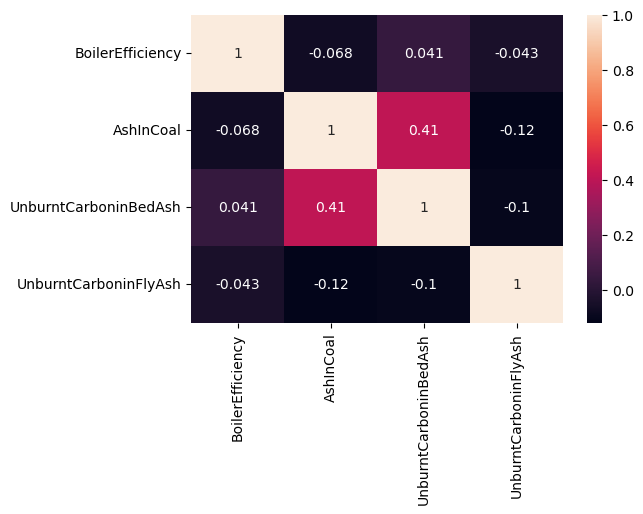

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(hldtua.corr(), annot=True)

# start linear regression model

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(predictor, target, test_size=0.20, random_state=0)

In [58]:
print("X train value is:", X_train.shape)
print("X test value is:", X_test.shape)
print("y train value is:", y_train.shape)
print("y test value is:", y_test.shape)

X train value is: (3975, 43)
X test value is: (994, 43)
y train value is: (3975, 1)
y test value is: (994, 1)


In [59]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [60]:
regr = linear_model.LinearRegression()
"""param_dist={'positive':[True, False],
            'fit_intercept':[True, False],
            }
"""

"param_dist={'positive':[True, False],\n            'fit_intercept':[True, False],\n            }\n"

In [61]:
""" from sklearn.model_selection import RandomizedSearchCV"""

' from sklearn.model_selection import RandomizedSearchCV'

In [62]:
"""random_search = RandomizedSearchCV(regr, param_dist,cv=5, n_iter=10)
random_search.fit(X_train, y_train)"""

'random_search = RandomizedSearchCV(regr, param_dist,cv=5, n_iter=10)\nrandom_search.fit(X_train, y_train)'

In [63]:
"""print('The best parameters are:',random_search.best_params_)"""

"print('The best parameters are:',random_search.best_params_)"

In [64]:
"""print('The best parameters score is:',random_search.best_score_)"""

"print('The best parameters score is:',random_search.best_score_)"

In [65]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [66]:
y_pred=y_pred.reshape(-1, 1)
#y_pred=target_scaler.inverse_transform(y_pred)
#y_test=target_scaler.inverse_transform(y_test)

In [67]:
# The coefficients
print("Coefficients: \n", regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Test Score %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[ 2.93819847e+01 -2.05882669e+01  2.11192116e+01 -1.63692463e+02
   2.22150881e+02  2.06506654e+01 -1.16130934e+01 -9.37447336e+01
   2.76569422e+02 -2.24981005e+02  1.73728628e+01  2.22450502e+01
   1.99579672e+01 -1.47412540e+00 -2.42082116e-01  9.82669610e+00
  -2.24456016e+01 -3.39011525e+00  1.53282183e+00 -2.04390341e+07
  -2.03669609e+00  1.05156254e+01 -6.16205940e-01  2.17540646e+01
  -3.83028674e-01 -8.55828658e-04  1.04562547e-02 -6.14481606e-03
  -2.20823463e+01 -8.61263500e+00 -1.68176927e+00  5.72640969e+00
   2.83827295e-03  8.69716679e+01  8.57075846e+01  6.29024442e-03
  -2.04999141e+02 -6.18876598e+00 -1.47646879e+00  2.04390328e+07
  -1.32617521e+00  1.24720626e-01 -3.13249384e+00]]
Mean squared error: 8.53
Mean absolute error: 1.32
Test Score 0.87


# Decision Tree Regressor 

In [68]:
predictor.shape

(4969, 43)

In [69]:
target.shape

(4969, 1)

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
# Create decision regression object
regd=DecisionTreeRegressor()

In [109]:
param_dist={'splitter':['best', 'random'],
            'max_depth':[1,3,5,7,9,11, None],
            #'min_sample_split': [2,3,5,7,9],
            #'min_sample_leaf': [1,2,3,4,5,6,7,8,9],
            'min_weight_fraction_leaf': [ 0.0, 0.1, 0.2, 0.01, 0.02],
            'max_features': ['auto', 'log2', 'sqrt', None],
            'max_leaf_nodes': [15, 20, 25, 30],
            'ccp_alpha': [0.0, 0.01, 0.001, 0.02,0.002]
    
}

In [110]:
from sklearn.model_selection import RandomizedSearchCV

In [111]:
random_search = RandomizedSearchCV(regd, param_dist,cv=3, n_iter = 40)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=40,
                   param_distributions={'ccp_alpha': [0.0, 0.01, 0.001, 0.02,
                                                      0.002],
                                        'max_depth': [1, 3, 5, 7, 9, 11, None],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [15, 20, 25, 30],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.01,
                                                                     0.02],
                                        'splitter': ['best', 'random']})

In [112]:
random_search.best_params_

{'splitter': 'random',
 'min_weight_fraction_leaf': 0.01,
 'max_leaf_nodes': 25,
 'max_features': None,
 'max_depth': 3,
 'ccp_alpha': 0.01}

In [113]:
random_search.best_score_ #if this dosent run, then try running all the cells from dtt=DecisiocTreeregression and after that, run this best score and re run all the cdlls benith. 

0.9001109036393626

In [115]:
"""dtt=DecisionTreeRegressor(splitter= 'random',
 min_weight_fraction_leaf= 0.01,
 max_leaf_nodes= 25,
 max_features= None,
 max_depth= 3,
 ccp_alpha= 0.01)"""

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(predictor, target, test_size=0.20, random_state=42)

In [145]:
print("X train value is:", X_train.shape)
print("X test value is:", X_test.shape)
print("y train value is:", y_train.shape)
print("y test value is:", y_test.shape)

X train value is: (3975, 43)
X test value is: (994, 43)
y train value is: (3975, 1)
y test value is: (994, 1)


In [146]:
dtt = DecisionTreeRegressor(splitter= 'random',
 min_weight_fraction_leaf= 0.0,
 max_leaf_nodes= 30,
 max_features= 'log2',
 max_depth= None,
 ccp_alpha= 0.0)

In [147]:
dtt=random_search.fit(X_train, y_train)

In [148]:
y_pred = dtt.predict(X_test)

In [149]:
dtt.score(X_train,y_train)

0.970848144345561

In [150]:
dtt.score(X_test,y_test)

0.9712617706443533

In [151]:
y_pred=y_pred.reshape(-1, 1)
#y_pred=target_scaler.inverse_transform(y_pred)
#y_test=target_scaler.inverse_transform(y_test)

In [152]:


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 2.73
Mean absolute error: 0.72
Coefficient of determination: 0.97
